# Heart disease prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import the data

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Exploratory Data Analysis

In [3]:
# The data contains 303 rows with 14 columns
# 9 columns are categorical
# 5 are numerical

In [93]:
num_features = ['age','trtbps','chol','thalachh','oldpeak']
cat_features = ['sex','cp','fbs','restecg','exng','slp','caa','thall','output']
multi_cat_features = ['cp','restecg','slp','caa','thall']

In [5]:
df[cat_features]=df[cat_features].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    category
 11  caa       303 non-null    category
 12  thall     303 non-null    category
 13  output    303 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 16.0 KB


In [7]:
df[num_features].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [8]:
df[cat_features].describe()

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


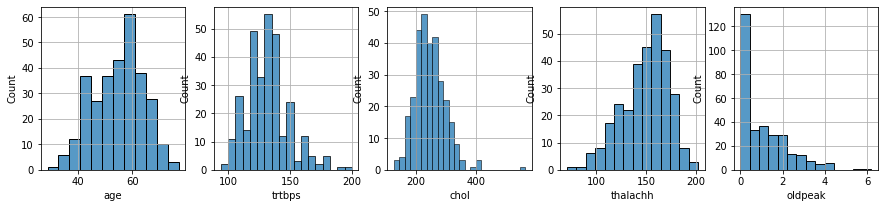

In [11]:
plt.figure(figsize=(15,3))
j = 0
for i in num_features:
    j = j+1
    plt.subplot(1,5,j)
    sns.histplot(x=df[i])
    plt.grid()

In [14]:
df_0 = df[df['output']==0]
df_1 = df[df['output']==1]

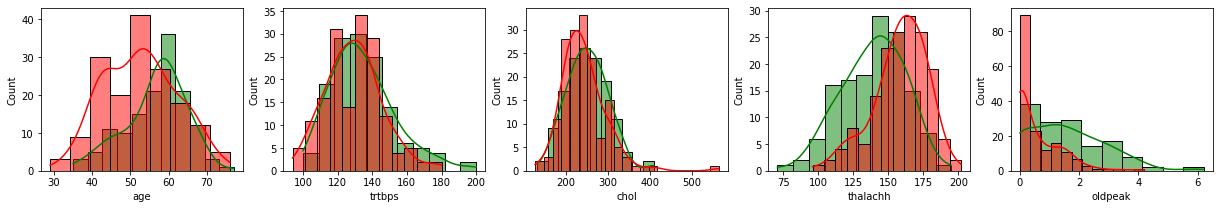

In [96]:
fig,ax = plt.subplots(1,5,figsize=(21,3))
ax = ax.flatten()
j = 0
for i in num_features:
    sns.histplot(x=df_0[i],color='green',label='Positive',ax=ax[j],kde=True)
    sns.histplot(x=df_1[i],color='red',label='Negative',ax=ax[j],kde=True)
    j = j+1

In [43]:
# The age, trtbps and chol follows normal distribution centered
# thalachh and old peak are skewed
# For later analysis , we will check if :
# - the age and the output are independent
# - the oldpeak and the output are independant

<AxesSubplot:>

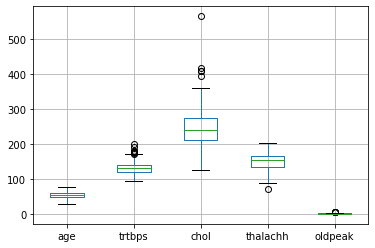

In [39]:
df[num_features].boxplot()

In [45]:
# trtbps, chol, thalachh and oldpeak have some outliers
# They will be fixed with RobustScaler when modelling

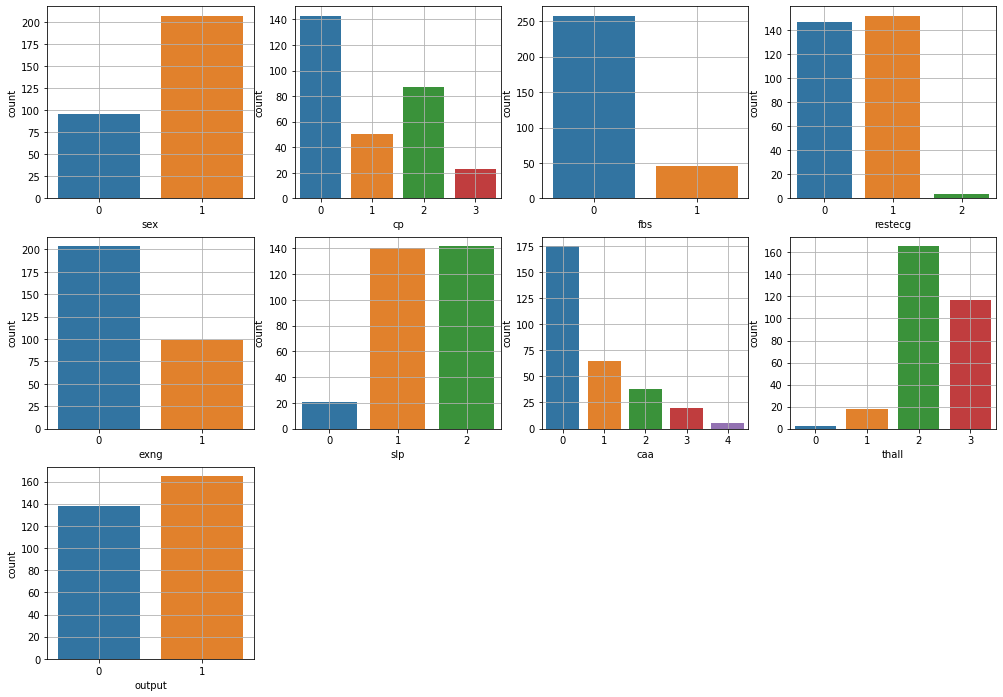

In [40]:
plt.figure(figsize=(17,12))
j = 0
for i in cat_features:
    j = j+1
    plt.subplot(3,4,j)
    sns.countplot(x=df[i])
    plt.grid()

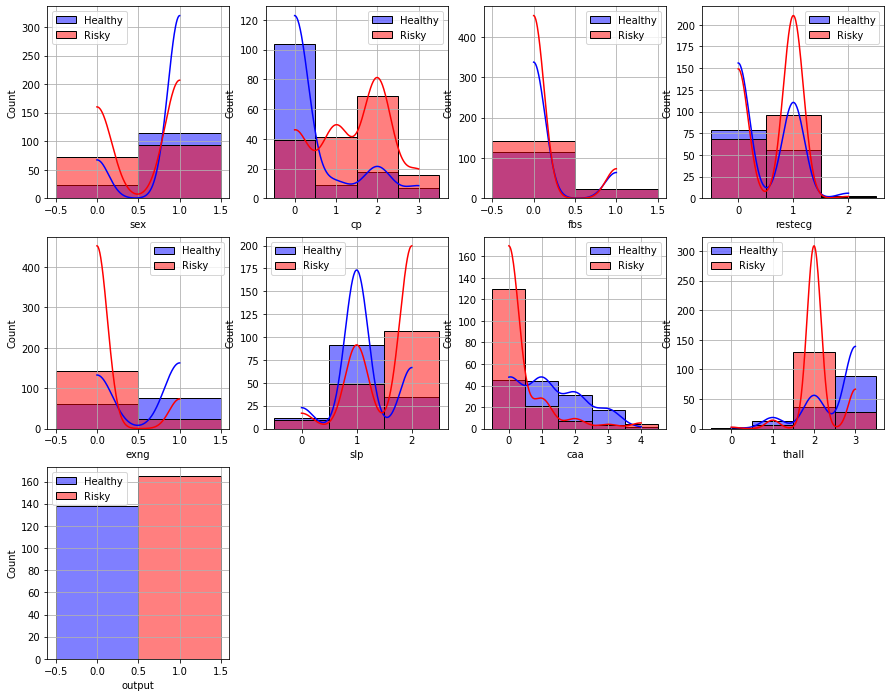

In [46]:
plt.figure(figsize=(15,12))
j = 0
for i in cat_features:
    j = j+1
    plt.subplot(3,4,j)
    sns.histplot(x=df_0[i],kde=True,label='Healthy',color='blue')
    sns.histplot(x=df_1[i],kde=True,label='Risky',color='red')
    plt.grid()
    plt.legend()

In [47]:
# We will test an hypothesis which of these categorical variables is the most related to the output

<AxesSubplot:>

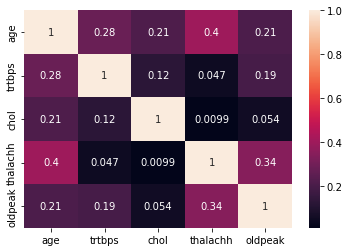

In [48]:
sns.heatmap(abs(df[num_features].corr()),annot=True)

### Hypothesis testing

In [49]:
# Let make a statistical test to understand the dependence between the Output and each input variables

In [50]:
from scipy.stats import ttest_ind

In [51]:
df_test = df.sample(303)
columns = df_test.drop(['output'],axis=1).columns

In [52]:
def t_test(col):
    alpha = 0.05
    stat,p = ttest_ind(df_test[col],df_test['output'])
    if p<alpha:
        return 'H0 rejected'
    else:
        return 0

In [53]:
for col in columns:
    print(f'{col :-<50} {t_test(col)}')

age----------------------------------------------- H0 rejected
sex----------------------------------------------- H0 rejected
cp------------------------------------------------ H0 rejected
trtbps-------------------------------------------- H0 rejected
chol---------------------------------------------- H0 rejected
fbs----------------------------------------------- H0 rejected
restecg------------------------------------------- 0
thalachh------------------------------------------ H0 rejected
exng---------------------------------------------- H0 rejected
oldpeak------------------------------------------- H0 rejected
slp----------------------------------------------- H0 rejected
caa----------------------------------------------- H0 rejected
thall--------------------------------------------- H0 rejected


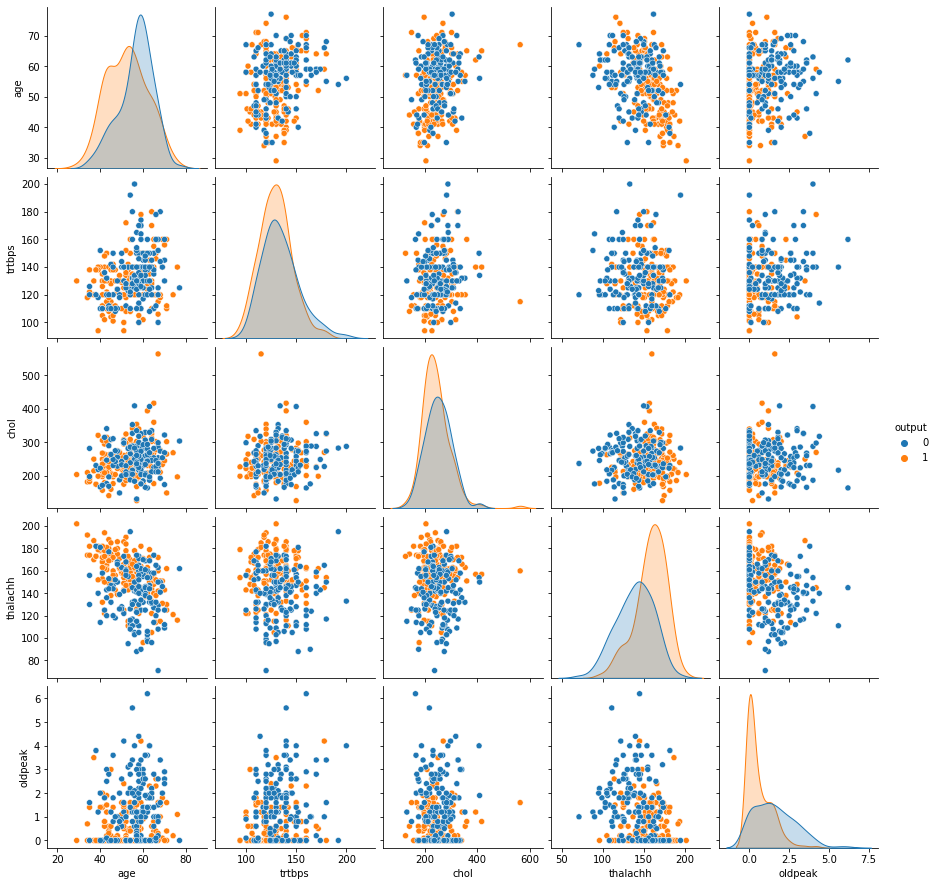

In [54]:
sns.pairplot(data = df,vars=num_features,hue='output')

## Model Building

In [152]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,RobustScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve
from sklearn.feature_selection import SelectFromModel,SelectKBest,f_classif
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score,classification_report,confusion_matrix
from sklearn.ensemble import IsolationForest

In [153]:
#Select a features for a specific transformer

In [154]:
num_pipeline = make_pipeline(MinMaxScaler(),RobustScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
#transformer  = make_column_transformer((cat_pipeline,multi_cat_features),(num_pipeline,num_features))
cat_features = make_column_selector(dtype_include='category')
num_features = make_column_selector(dtype_exclude='category')
transformer = make_column_transformer((cat_pipeline,cat_features),(num_pipeline,num_features))
preprocessor = make_pipeline(transformer,SelectFromModel(SGDClassifier(),threshold='median'))
#preprocessor = make_pipeline(transformer)

In [155]:
df=df.drop_duplicates()
X = df.drop(['sex','output'],axis=1)
y = df[['output']].values.ravel()

In [177]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25,shuffle=True,stratify=y)

### Remove Outliers with Isolation Forest

In [178]:
isf = make_pipeline(preprocessor,IsolationForest(contamination=0.1))
isf.fit(X_train,Y_train)
clean_data = isf.predict(X_train)==1
X_train = X_train[clean_data]
Y_train = Y_train[clean_data]

In [179]:
# Those function are are used to plot learning curves (training score vs validation score), 
# test the model on the test set, and to optimize the model

In [180]:
def plot_learning_curve(model,X_train,Y_train,scoring='f1'):
    train_sizes = np.array([0.2,0.4,0.6,0.8,1])
    N,train_score,val_score=learning_curve(model,X_train,Y_train,scoring=scoring,train_sizes=train_sizes)
    plt.figure()
    plt.plot(N,train_score.mean(axis=1),color='orange',label='Training Score')
    plt.plot(N,val_score.mean(axis=1),color='blue',label='Validation Score')
    plt.xlabel('Training size')
    plt.ylabel(scoring)
    plt.legend()
    title = 'Learning Curve : {}'.format(model.steps[-1][0])
    plt.title(title)
    plt.grid()
def testing(model,X_test,Y_test):
    print('----- Testing the model -----')
    y_pred = model.predict(X_test)
    print('Accuracy Score : ', model.score(X_test,Y_test))
    print('Classification reports: \n')
    print(classification_report(Y_test,y_pred))
    plt.figure(figsize=(3,3))
    plt.title('Confusion matrix')
    sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True)
def optimize_model(model,X_train,Y_train,param_grid,scoring='recall'):
    gs = GridSearchCV(model,param_grid=grid,scoring=scoring,n_jobs=4,verbose=True)
    gs.fit(X_train,Y_train)
    print('Best Parameter: ',gs.best_params_)
    print('Best Score:',gs.best_score_)
    return gs.best_estimator_

def train_models(models,X_train,Y_train,scoring='f1'):
    keys = list(models.keys())
    ml_models = {}
    for k in keys:
        model = models[k]
        model.fit(X_train,Y_train)
        plot_learning_curve(model,X_train,Y_train,scoring=scoring)
        ml_models.update({k:model})
    return ml_models

### Model Building

In [181]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [182]:
models = {'knn':make_pipeline(preprocessor,KNeighborsClassifier(n_jobs=4)),
          'logreg':make_pipeline(preprocessor,LogisticRegression(n_jobs=4)),
          'decitree':make_pipeline(preprocessor,DecisionTreeClassifier()),
          'sgd':make_pipeline(preprocessor,SGDClassifier(n_jobs=4)),
          'svm': make_pipeline(preprocessor,SVC(kernel='rbf',C=1.0,gamma=1.0)),
          'rf':make_pipeline(preprocessor,RandomForestClassifier(n_jobs=4))}

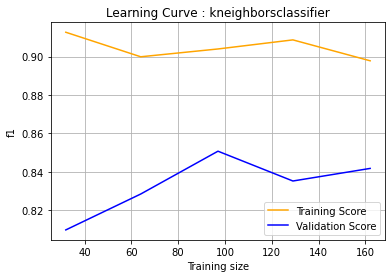

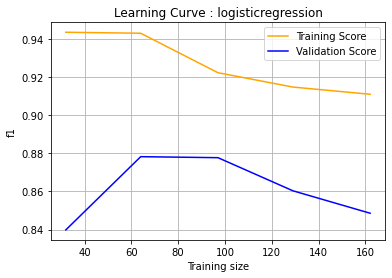

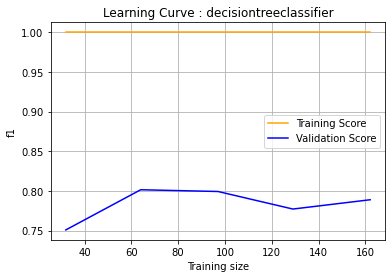

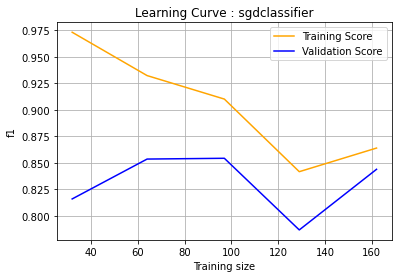

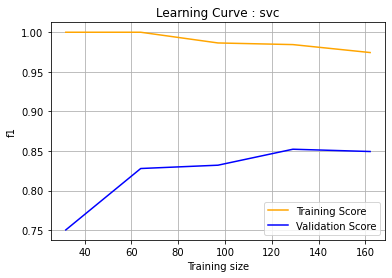

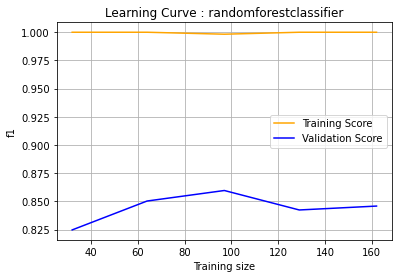

In [183]:
models = train_models(models,X_train,Y_train)

For the modelling we are going to choose the following models:
* Logistic Regression
* Support Vector Machine
* KNN

In [184]:
svm = models['svm']
lr = models['logreg']
knn = models['knn']

### Logistic Regression

----- Testing the model -----
Accuracy Score :  0.75
Classification reports: 

              precision    recall  f1-score   support

           0       0.74      0.71      0.72        35
           1       0.76      0.78      0.77        41

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.75      0.75      0.75        76



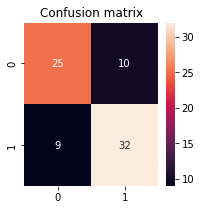

In [185]:
testing(lr,X_test,Y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameter:  {'logisticregression__C': 8}
Best Score: 0.8501992989610274
----- Testing the model -----
Accuracy Score :  0.7894736842105263
Classification reports: 

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        35
           1       0.77      0.88      0.82        41

    accuracy                           0.79        76
   macro avg       0.80      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76



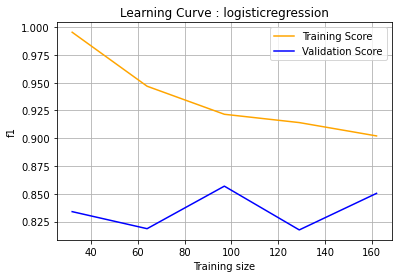

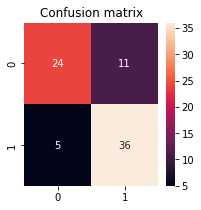

In [186]:
grid = {'logisticregression__C':[0.001,8,15,25,100]}
lr = optimize_model(lr,X_train,Y_train,param_grid=grid,scoring='f1')
plot_learning_curve(lr,X_train,Y_train,scoring='f1')
testing(lr,X_test,Y_test)

### Support Vector Machine
It is time to test and tune the Support Vector Machine

----- Testing the model -----
Accuracy Score :  0.4605263157894737
Classification reports: 

              precision    recall  f1-score   support

           0       0.33      0.17      0.23        35
           1       0.50      0.71      0.59        41

    accuracy                           0.46        76
   macro avg       0.42      0.44      0.41        76
weighted avg       0.42      0.46      0.42        76



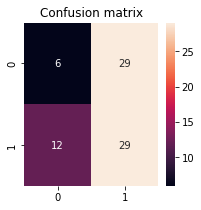

In [187]:
testing(svm,X_test,Y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameter:  {'svc__C': 450, 'svc__gamma': 0.0001}
Best Score: 0.8737461352989563


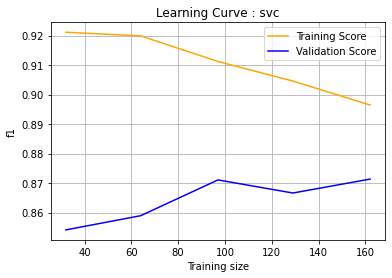

In [188]:
grid = {'svc__C':[450,455,425],'svc__gamma':[0.001,0.0001,0.1]}
svm = optimize_model(svm,X_train,Y_train,param_grid=grid,scoring='f1')
plot_learning_curve(svm,X_train,Y_train,scoring='f1')

----- Testing the model -----
Accuracy Score :  0.7894736842105263
Classification reports: 

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        35
           1       0.77      0.88      0.82        41

    accuracy                           0.79        76
   macro avg       0.80      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76



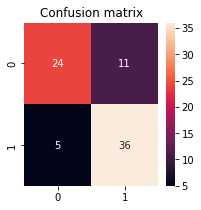

In [189]:
testing(svm,X_test,Y_test)

### KNN Classifier

----- Testing the model -----
Accuracy Score :  0.4342105263157895
Classification reports: 

              precision    recall  f1-score   support

           0       0.38      0.34      0.36        35
           1       0.48      0.51      0.49        41

    accuracy                           0.43        76
   macro avg       0.43      0.43      0.43        76
weighted avg       0.43      0.43      0.43        76



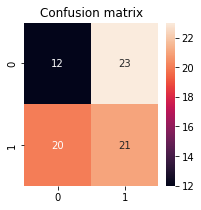

In [190]:
testing(knn,X_test,Y_test)

In [239]:
svm.named_steps.svc.probability=True

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameter:  {'kneighborsclassifier__n_neighbors': 5}
Best Score: 0.8796660482374768


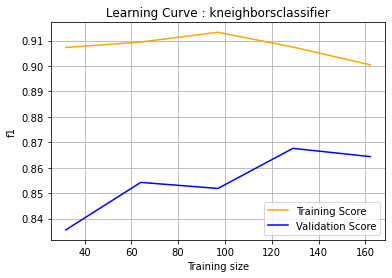

In [191]:
grid = {'kneighborsclassifier__n_neighbors':[3,5,10,15,20]}
knn =optimize_model(knn,X_train,Y_train,param_grid=grid,scoring='f1')
plot_learning_curve(knn,X_train,Y_train)

# Moving the classification threshold

In [269]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
def get_optimal_threshold(model,X_train,Y_train):
    y_proba = cross_val_predict(estimator=model,X=X_train,y=Y_train,n_jobs=4,method='predict_proba')
    prec,rec,th = precision_recall_curve(Y_train,y_proba[:,1])
    plt.plot(th,prec[:-1],label='prec',color='blue')
    plt.plot(th,rec[:-1],label='rec',color='yellow')
    plt.title('Precision-Recall curves')
    plt.xlabel('Threshold')
    plt.ylabel('Scoring')
    plt.legend()
    diff = abs(prec[:-1]-rec[:-1])
    optimal_threshold = th[diff==diff.min()]
    print(optimal_threshold)
    return optimal_threshold

In [274]:
class personalized_model:
    def __init__(self,model,threshold):
        self.model = model;
        self.threshold = threshold
    def predict(self,X):
        pred = self.model.predict(X)
        pred[pred>=self.threshold]=1
        pred[pred<self.threshold]=0
        return pred
    def testing(self,X_test,Y_test):
        print('----- Testing the model -----')
        y_pred = self.model.predict(X_test)
        #print('Accuracy Score : ', model.score(X_test,Y_test))
        print('Classification reports: \n')
        print(classification_report(Y_test,y_pred))
        plt.figure(figsize=(3,3))
        plt.title('Confusion matrix')
        sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True)

[0.5241272]


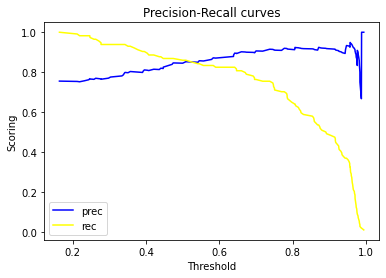

In [275]:
th = get_optimal_threshold(svm,X_train,Y_train)

----- Testing the model -----
Classification reports: 

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        35
           1       0.77      0.88      0.82        41

    accuracy                           0.79        76
   macro avg       0.80      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76



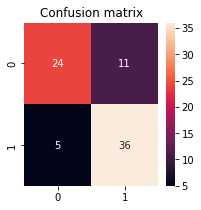

In [276]:
pers_svm = personalized_model(model = svm,threshold= th)
pers_svm.testing(X_test,Y_test)

In [277]:
from joblib import dump,load

In [278]:
dump(svm,'svm_.p')
dump(lr,'lr_c.p')
dump(knn,'knn_.p')

['knn_.p']